## Linear Regression

Linear Regression is a statistical method used to predict numeric outcomes by analyzing the outcome’s relationship with one or more predictor variables.

## Basic steps of regression

STEP 1 PREPARE DATA

* Preparing the data includes dealing with issues such as missing, dirty, or duplicate data; removing outliers; blending and formatting data, etc. Your final dataset should include one row for each outcome and set of predictor variables.
Estimation and validation samples: Next, split the data set into two parts: one part for Estimation (for training the model) and one part for Validation (to help us verify that we are creating a useful model).

STEP 2 SELECT TARGET AND PREDICTOR VARIABLES

* Target Variable: The target variable is the variable we are trying to predict with the model. This should be continuous numeric variable, such as price, revenue, customers, etc.
Predictor variables: The predictor variables are used to help predict the target variable. Predictor variables should be: (1) Relevant to the target variable, (2) not highly correlated to other predictor variables, and (3), do not have a high number of missing values

STEP 3: BUILD AND RUN THE MODEL

* Run the model with the target and predictor variables. Observe the statistical significance of each of the predictor variables by looking at the p-value in the output. If it’s below 0.05, then the relationship between the target and predictor variable is statistically significant. If not, it is not significant and can be excluded from the model. R-squared is an estimate between 0 and 1 of the explanatory power of them model, and can be used to compare models and select the best one.

STEP 4: MODEL VALIDATION
* Apply the model to the validation sample and observe how accurately the model predicts the outcomes. This step helps avoid overfitting and helps you understand how accurate your predictions will be on new data.

STEP 5: APPLY THE MODEL TO MAKE PREDICTIONS

* Apply the model to a new dataset to make predictions. This dataset should have all the predictor variable values, which are passed through the model to predict the unknown target variable value.

### Interpreting regression results

##### P Value
The p value is the probability that the observed results (the coefficient estimate) occurred by chance, and that there is no actual relationship between the predictor and target variable. In other words, the p-value is the probability that the coefficient is zero. The lower the p-value the higher the probability that a relationship exists between the predictor and target variable. If the p-value is high, we should not rely on the coefficient estimate. When a predictor variable has a p-value below 0.05, the relationship between it and the target variable is considered to be statistically significant.
Statistical Significance - "Statistical significance is a result that is not likely to occur randomly, but rather is likely to be attributable to a specific cause."

##### R-squared
R-squared ranges from 0 to 1 and represents the amount of variation in the target variable explained by the variation in the predictor variables. The higher the r-squared, the higher the explanatory power of the model.

###  Linear regression example two 

We can build a linear regression model using the workflow we just described. In this case, we will use the automobile data we prepared in the data munging class 

As a first step, let's execute the code in the cell below to load the packages we need to run the rest of this notebook.

In [1]:
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

%matplotlib inline

The code in the cell below loads the dataset which was prepared using steps from the Data Munging class. We will execute this code and ensure that the expected columns are present.

In [2]:
auto_prices = pd.read_csv('Auto_Data_Preped.csv')
auto_prices.head(5)

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,log_price
0,3,alfa-romero,gas,std,two,hardtop_convert,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,9.510075
1,3,alfa-romero,gas,std,two,hardtop_convert,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,9.711116
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,9.711116
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,9.543235
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,9.767095


We can notice that there are both numeric and categorical features

## Prepare the model matrix.

Scikit-learn is the library we use for machine learning. All scikit-learn models require a numpy array of numeric only values for the features. The resulting array is often referred to as the **model matrix**. 

To create a model matrix from cases with both numeric and categorical variables requires two steps. First, the numeric features must be rescaled. Second, the categorical variables must be converted to a set of **dummy variables** to encode the presence or not of each category.

### Create dummy variables from categorical features

Now, we have to create dummy variables for the categorical features. Dummy variables encode categorical features as a set of binary variables. There is one dummy variable for each possible category. For each case all of the values in the dummy variables are set to zero, except the one corresponding to the category value, which is set to one. In this way, a categorical variable with any number of categories can be encoded as series of numeric features which scikit-learn can operate on. This process is referred to as **one hot encoding** since only one dummy variable is coded as 1 (hot) per case. 

The `sklearn.preprocessing` package contains functions to encode categorical features as dummy variables in two steps;
1. The categories are  encoded as numbers starting with 0. For example, if there are 5 categories, they are encoded as the set $\{ 0,1,2,3,4 \}$.
2. The numeric categories are then encoded as dummy variables. 

The code in the cell below computes the numeric representation of the categories for the `body_style` feature by the following steps:

1. An encoder object is created using the `LabelEncoder` method.
2. The encoder is `fit` to the unique string values of the feature. 
3. The `transformation` method then applies the numeric encoding to the original feature. 

Let us execute the code in the cell below and examine the result.

In [3]:
print(auto_prices['body_style'].unique())
Features = auto_prices['body_style']
enc = preprocessing.LabelEncoder()
enc.fit(Features)
Features = enc.transform(Features)
print(Features)

['hardtop_convert' 'hatchback' 'sedan' 'wagon']
[0 0 1 2 2 2 2 3 2 2 2 2 2 2 2 2 2 1 1 2 1 1 1 1 2 2 2 3 1 1 1 1 1 1 2 3 1
 1 2 2 2 2 2 1 2 2 2 1 1 1 2 2 1 2 1 2 2 1 2 2 2 3 0 2 2 0 2 0 1 1 1 1 1 1
 1 1 1 1 2 2 2 2 2 2 2 2 3 2 1 2 3 0 1 2 2 3 2 1 1 1 2 2 3 3 2 2 3 3 2 2 2
 1 1 1 2 2 3 1 1 0 0 0 1 2 1 2 1 2 1 1 1 2 2 2 2 2 3 3 3 3 1 1 1 3 3 3 2 1
 2 1 2 1 2 2 1 2 1 0 0 1 0 1 0 2 2 1 2 1 1 1 2 3 2 2 2 2 2 2 2 0 1 2 2 3 2
 3 2 3 2 3 2 2 2 2 2]


We can notice that the four original body style categories of this feature is now coded as integers in the set $\{ 0,1,2,3 \}$.

For the next step in the process, the numerically coded categorical variable will be converted to a set of dummy variables following these steps:
1. A one hot encoder object is created using the `OneHotEncoder` method from the `sklearn.preprocessing` module.
2. The numerically coded categorical feature is fit with the one hot encoder. 
3. The dummy variables are encoded using the `transform` method on the encodings.

Let's execute the code in the cell below and examine the result.

In [4]:
ohe = preprocessing.OneHotEncoder()
encoded = ohe.fit(Features.reshape(-1,1))
Features = encoded.transform(Features.reshape(-1,1)).toarray()
Features[:10,:]

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

We can notice that the `body_style` feature has been encoded as four columns. Each of these columns is a dummy variable representing one category. Each row has one and only one dummy variable with a 1, and the rest 0s. This is the one hot encoding. 

Now, we need to one hot encode all five categorical variables we are interested in and append them as columns to the model matrix with the scaled numeric variables. The code in the cell below executes a `for` loop that calls the `encode_string` function and uses the numpy `concatenate` function to add the dummy variables to the model matrix. The `encode_string` function uses the same process we just discussed above. 

In [5]:
def encode_string(cat_feature):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_feature)
    enc_cat_feature = enc.transform(cat_feature)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_feature.reshape(-1,1))
    return encoded.transform(enc_cat_feature.reshape(-1,1)).toarray()
    

categorical_columns = ['fuel_type', 'aspiration', 'drive_wheels', 'num_of_cylinders']

for col in categorical_columns:
    temp = encode_string(auto_prices[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)
print(Features[:,2 :])  

(195, 14)
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 1. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]]


We can see that the model matrix now has 14 features which encode the five categorical features we started with

### Add the numeric features

To complete the model matrix, we will execute the code in the cell below to concatenate the three numeric features we want to use.

In [6]:
Features = np.concatenate([Features, np.array(auto_prices[['curb_weight', 'horsepower', 'city_mpg']])], axis = 1)
Features[:1,:]

array([[1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 2.548e+03, 1.110e+02, 2.100e+01]])

## Split the dataset

With the model matrix constructed, we have to now create randomly sampled training and test data sets. The code in the cell below uses the `train_test_split` function from the `sklearn.model_selection` module to sample the cases in the original dataset into the two subsets (Bernoulli sampling). Since this data set is small, only 40 cases will be included in the test dataset.

In [7]:
## Randomly sample cases to create independent training and test data
nr.seed(9988)
labels = np.array(auto_prices['log_price'])
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 40)
x_train = Features[indx[0],:]
# ravel method in numpy is used to generate a flattened 1-D array
y_train = np.ravel(labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

### Rescale numeric features

Numeric features must be rescaled so they have a similar range of values. Rescaling prevents features from having an undue influence on model training simply because then have a larger range of numeric variables. 

The code in the cell below uses the `StandardScaler` function from the Scikit Learn preprocessing package to perform Zscore scaling of the numeric features. We can notice that the scaler is fit only on the training data. The trained scaler is these applied to the test data. Test data should always be scaled using the parameters from the training data. 

Let's execute this code.

In [8]:
scaler = preprocessing.StandardScaler().fit(x_train[:,14:])
x_train[:,14:] = scaler.transform(x_train[:,14:])
x_test[:,14:] = scaler.transform(x_test[:,14:])
print(x_train.shape)
x_train[:1,:]

(155, 17)


array([[ 0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        , -0.5384069 ,
        -1.26225437,  1.33602998]])

## Construct the Linear Regression Model

With data prepared and split into training and test subsets, we can now compute the linear regression model. With the dummy variables created there are 17 features, so the model will require 17 coefficients. There is no intercept specified since we are working with dummy variables. The equation for such a **multiple regression** problem can be written as:

$$\hat{y} = f(\vec{x}) = \vec{\beta} \cdot \vec{x} + b\\ = \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n + b$$  
where; 
$\hat{y}$ are the predicted values or scores,   
$\vec{x}$ is the vector of feature values with components $\{ x_1, x_2, \cdots, x_n$,  
$\vec{\beta}$ is vector of model coefficients with components $\{ \beta_1, \beta_2, \cdots, \beta_n$,  
$b$ is the intercept term, if there is one.

We can think of the linear regression function $f(\vec{x})$ as the dot product between the beta vector $\vec{\beta}$ and the feature vector $\vec{x}$, plus the intercept term $b$.

The code in the cell below uses the `sklearn import linear_model` to compute a least squares linear model as follows:
1. A linear regression model object is created with the `LinearRegression` method. Notice, that in this case, no intercept will be fit. The intercept value or **bias** will be accommodated in the coefficients of the dummy variables for the categorical features. 
2. The model is fit using the `fit` method with the numpy array of features and the label. 

Let's execute this code.

In [9]:
## define and fit the linear regression model
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

The model has been fit to the training data. We can execute the code in the cell below to examine the value of the intercept term and coefficients.

In [10]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[ 1.36372345  1.15436725  1.27397827  1.16791069  2.57778903  2.38219063
  2.48184692  2.47813274  1.62299441  1.62646566  1.71051959  1.70397511
  1.71596353  1.54004103  0.18009827  0.14148126 -0.07296916]


## Evaluate the model

We can now use the test dataset to evaluate the performance of the regression model. The first step is to execute the code in the cell below to compute and display various performance metrics and examine the results

In [11]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lin_mod.predict(x_test) 
print_metrics(y_test, y_score, 28)

Mean Square Error      = 0.022616207744398098
Root Mean Square Error = 0.15038686027841028
Mean Absolute Error    = 0.11912678436796269
Median Absolute Error  = 0.10696449432931665
R^2                    = 0.9216386321026073
Adjusted R^2           = 0.7453255543334738


At first glance, these metrics look promising. The RMSE, MAE and median absolute error are all small and in a similar range. However, we can notice that the $R^2$ and $R^2_{adj}$ are rather different. This model has a large number of parameters compared to the number of cases available. This result indicates that the model may be overfit and might not generalize well. 

To continue the evaluation of the model performance, we will execute the code in the cell below to examine an histogram of the residuals 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


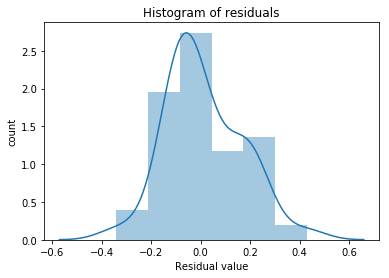

In [12]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score)    

This histogram shows that the residuals are in a small range. However, there is some noticeable skew in the distribution.

Next we will look at a plot of residuals versus predicted value

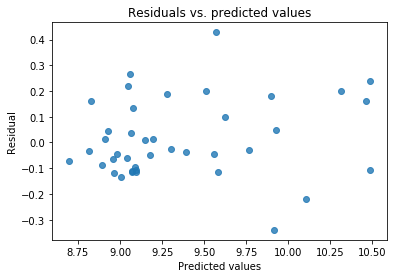

In [13]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test, y_score) 

This plot looks reasonable. The residual values appear to have a fairly random dispersion as the predicted value changes. A few large residuals are noticeable, particularly on the positive side.

We should remember that this residual plot is for the log of the auto price. What does the plot look like when transformed to real prices? Let's execute the code in the cell below to find out.

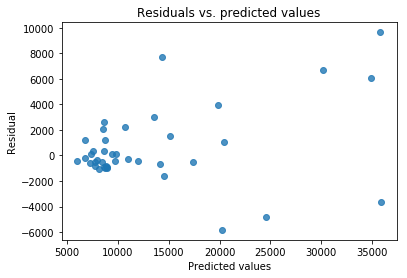

In [14]:
y_score_untransform = np.exp(y_score)
y_test_untransform = np.exp(y_test)
resid_plot(y_test_untransform, y_score_untransform) 

This new plot shows a pattern. The dispersion of the residuals has a cone-like pattern increasing to the right. The regression model seems to do a good job of predicting the price of low cost cars, but becomes progressively worse as the price of the car increases.

## Summary

In this example, we have done the following in the process of constructing and evaluating a multiple linear regression model:   

1. Scaled the numeric features. 
2. Recoded the categorical features as binary dummy variables. 
3. Fit the linear regression model using scikit-learn. 
4. Evaluated the performance of the model using both numeric and graphical methods. 

It is clear from the outcome of the performance evaluation that this model needs to be improved. As it is, the model shows poor generalization. 